In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
test = pd.read_csv('C:/Users/SHUBHAM ARORA/Desktop/BDDA/Restaurant Revenue Prediction/test.csv')
train = pd.read_csv('C:/Users/SHUBHAM ARORA/Desktop/BDDA/Restaurant Revenue Prediction/train.csv')

In [3]:
print(f"Shape of training data: {train.shape}\nShape of test dataset: {test.shape} \
    \nFeatures available: {train.columns}")

Shape of training data: (137, 43)
Shape of test dataset: (100000, 42)     
Features available: Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')


In [4]:
pd.options.display.max_columns=None

In [5]:
train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0


In [6]:
train.isnull().sum().any()

False

In [27]:
train.drop('Id',axis=1,inplace=True)

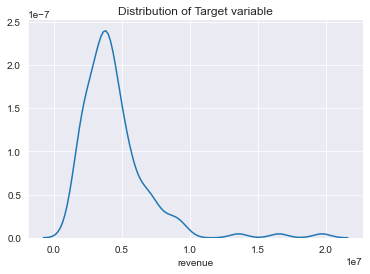

In [28]:
sns.distplot(train['revenue'],hist=False)
plt.title('Distribution of Target variable')
sns.despine()

In [29]:
train = train[train['revenue']<8e+06].copy()

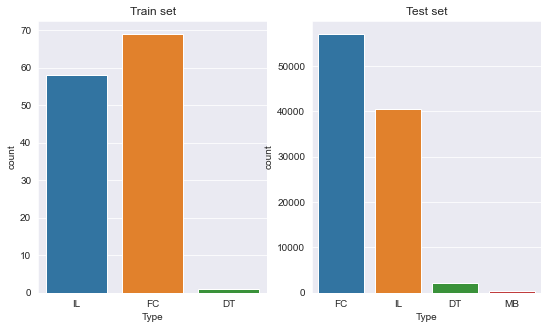

In [30]:
fig,ax = plt.subplots(1,2,figsize=(9,5))
sns.set_style('darkgrid')
sns.countplot(train.Type,ax=ax[0])
ax[0].set_title('Train set')
sns.countplot(test.Type,ax=ax[1])
ax[1].set_title('Test set');

In [31]:
df = pd.concat([train,test],axis=0)

In [32]:
df['Open Date'] = pd.to_datetime(df['Open Date'])
df['launch_Month'] = [x.month for x in df['Open Date']]
df['launch_year'] = [x.year for x in df['Open Date']]
df.drop(['Id','Open Date'],axis=1,inplace=True)

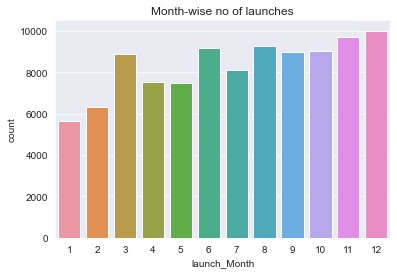

In [33]:
sns.countplot(df['launch_Month'])
plt.title('Month-wise no of launches');

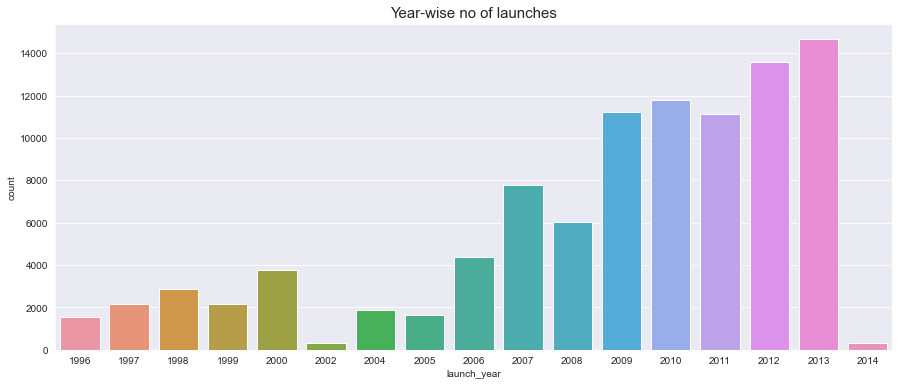

In [34]:
plt.figure(figsize=(15,6))
sns.countplot(df['launch_year'],order=[1996,1997,1998,1999,2000,2002,2004,2005,2006,
                                       2007,2008,2009,2010,2011,2012,2013,2014])
plt.title('Year-wise no of launches',fontsize=15);

In [35]:
df['Type'].value_counts()

FC    57088
IL    40505
DT     2245
MB      290
Name: Type, dtype: int64

In [36]:
df['City Group'].value_counts()

Other         50787
Big Cities    49341
Name: City Group, dtype: int64

In [37]:
df['City'].value_counts()

İstanbul     34130
Ankara        8739
İzmir         6472
Antalya       5915
Kocaeli       4365
             ...  
Osmaniye         1
Kastamonu        1
Tokat            1
Elazığ           1
Amasya           1
Name: City, Length: 63, dtype: int64

In [38]:
df.drop('City',axis=1,inplace=True)

In [39]:
df['Type'] = df['Type'].map({'FC':0,'IL':1,'DT':2,'MB':3})

In [40]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df['City Group'] = encoder.fit_transform(np.array(df['City Group']).reshape(-1,1))
df['City Group'] = df['City Group'].apply(int)

In [41]:
df.dropna().groupby('launch_Month')['revenue'].mean()

launch_Month
1     4.521243e+06
2     4.189109e+06
3     3.477052e+06
4     3.749950e+06
5     3.657800e+06
6     3.776214e+06
7     3.458596e+06
8     3.883020e+06
9     4.526998e+06
10    4.056980e+06
11    4.403934e+06
12    3.720047e+06
Name: revenue, dtype: float64

In [42]:
df.groupby('launch_year')['revenue'].mean()

launch_year
1995             NaN
1996    3.903884e+06
1997    4.286645e+06
1998    4.251905e+06
1999    5.246965e+06
2000    7.495092e+06
2001             NaN
2002    4.991022e+06
2003             NaN
2004    3.482435e+06
2005    3.298470e+06
2006    3.360841e+06
2007    4.317164e+06
2008    4.588214e+06
2009    4.094408e+06
2010    4.383878e+06
2011    4.147879e+06
2012    3.540404e+06
2013    2.532287e+06
2014    2.464944e+06
Name: revenue, dtype: float64

In [43]:
df.launch_year = df.launch_year.astype(str)
df.launch_Month = df.launch_Month.astype(str)
year_dummy = pd.get_dummies(df[['launch_year','launch_Month']],drop_first=True)
df = pd.concat([df,year_dummy],axis=1)
df.drop(['launch_year','launch_Month'],axis=1, inplace=True)

In [44]:
processed_df = df.dropna(axis=0)
processed_test_data = df[128:].drop('revenue',axis=1)

In [45]:
processed_df.shape,processed_test_data.shape

((128, 70), (100000, 69))

In [46]:
processed_df.head()

,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,launch_year_1996,launch_year_1997,launch_year_1998,launch_year_1999,launch_year_2000,launch_year_2001,launch_year_2002,launch_year_2003,launch_year_2004,launch_year_2005,launch_year_2006,launch_year_2007,launch_year_2008,launch_year_2009,launch_year_2010,launch_year_2011,launch_year_2012,launch_year_2013,launch_year_2014,launch_Month_10,launch_Month_11,launch_Month_12,launch_Month_2,launch_Month_3,launch_Month_4,launch_Month_5,launch_Month_6,launch_Month_7,launch_Month_8,launch_Month_9
0,0,1,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,1,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,1,1,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,1,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [47]:
from sklearn.model_selection import train_test_split
X=processed_df.drop('revenue',axis=1)
y=df['revenue'][:128]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=12345)

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

In [50]:
train.City.unique()

array(['İstanbul', 'Ankara', 'Diyarbakır', 'Tokat', 'Gaziantep',
       'Afyonkarahisar', 'Edirne', 'Kocaeli', 'Bursa', 'İzmir', 'Sakarya',
       'Elazığ', 'Kayseri', 'Eskişehir', 'Şanlıurfa', 'Samsun', 'Adana',
       'Antalya', 'Kastamonu', 'Uşak', 'Muğla', 'Kırklareli', 'Konya',
       'Karabük', 'Tekirdağ', 'Denizli', 'Balıkesir', 'Aydın', 'Amasya',
       'Kütahya', 'Bolu', 'Trabzon', 'Isparta', 'Osmaniye'], dtype=object)

In [52]:
len(train.City.unique())

34

Big Cities    69
Other         59
Name: City Group, dtype: int64

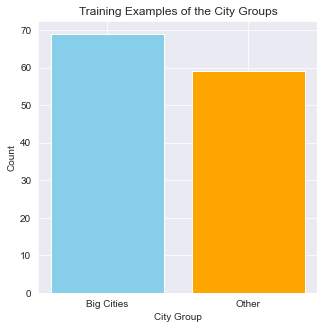

In [54]:
bigCities = len(train[train['City Group'] == "Big Cities"])
otherCount = len(train[train['City Group'] == "Other"])
dic_1 = {"Big Cities": bigCities, "Other": otherCount}

fig, ax = plt.subplots(figsize=(5, 5))
ax.bar(dic_1.keys(), 
       dic_1.values(), 
       width=0.8, 
       color=['skyblue', 'orange'])
ax.set(xlabel= "City Group", 
       ylabel='Count',
       title='Training Examples of the City Groups');
train['City Group'].value_counts()

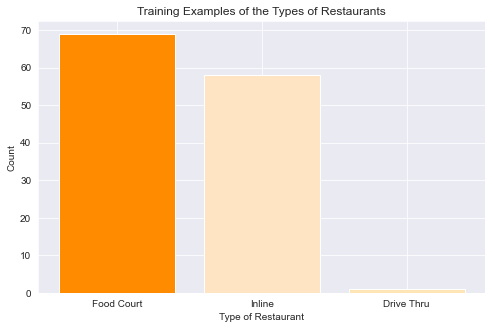

In [55]:
fc = len(train[train['Type'] == "FC"])
il = len(train[train['Type'] == "IL"])
dt = len(train[train['Type'] == "DT"])
dic_2 = {'Food Court': fc ,"Inline": il , "Drive Thru": dt}

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(dic_2.keys(), 
       dic_2.values(), 
       width=0.8, 
       color=['darkorange', 'bisque', 'moccasin'])
ax.set(xlabel='Type of Restaurant', 
       ylabel='Count',
       title='Training Examples of the Types of Restaurants');

In [57]:
train['Open Date'] = pd.to_datetime(train['Open Date'])
train['Open Date'].dtype
train.sort_values(by=['Open Date'], inplace=True, ascending=True, ignore_index=True)
train.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,1996-05-08,Adana,Other,IL,4,5.0,4.0,3.0,1,2,5,4,4,5,5,4,5.0,2,2,4,2,4,5,5,4,3,5,3,3,3.0,4.0,3.0,2.0,4,1,3,3,3,4,3,3,3903884.0
1,1997-04-10,İstanbul,Big Cities,IL,12,7.5,6.0,7.5,2,8,10,8,8,8,10,6,6.0,15,8,12,6,9,25,15,9,5,15,6,10,10.0,5.0,12.5,2.5,25,15,25,6,18,3,16,6,4286645.0
2,1998-01-28,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,1,3,5,5,4,4,2,4,4.0,3,4,4,2,4,5,5,2,4,3,5,3,4.0,2.0,4.0,2.0,3,5,5,2,3,5,4,4,4705945.0
3,1998-03-14,İstanbul,Big Cities,IL,4,5.0,5.0,4.0,1,5,5,5,4,4,2,4,4.0,3,4,2,1,4,2,3,2,2,1,3,3,4.0,5.0,3.0,3.0,3,2,1,2,2,1,3,3,3784230.0
4,1998-07-13,İstanbul,Big Cities,IL,12,7.5,6.0,6.0,2,8,10,10,10,10,4,10,7.5,15,10,15,15,12,10,9,6,3,5,10,10,12.5,5.0,5.0,7.5,20,15,25,4,24,15,20,6,2551252.0


In [58]:
train['Sale Day'] = train['Open Date'].dt.day
train['Sale Year'] = train['Open Date'].dt.year
train['Sale Month'] = train['Open Date'].dt.month

In [59]:
train['Sale Year'].value_counts()

2011    25
2012    17
2010    15
2009    14
2008    13
2013    12
2006     6
2007     6
1998     4
1999     3
2005     3
2004     3
2014     2
2002     2
2000     1
1997     1
1996     1
Name: Sale Year, dtype: int64

In [60]:
train['Sale Month'].value_counts()

8     17
12    16
10    13
11    11
2     11
5     10
3     10
1     10
9      9
6      9
7      8
4      4
Name: Sale Month, dtype: int64

In [61]:
ctg_vars = []

for col in train:
    if len(train[col].unique()) <= 30:
        ctg_vars.append(col)

In [62]:
i = 1
for k in range(1, 43):
    for p in ctg_vars:
        if p == "P" + str(i):
            ctg_vars.remove("P" + str(i))
            i += 1

In [63]:
print(ctg_vars)

['City Group', 'Type', 'Sale Day', 'Sale Year', 'Sale Month']


In [64]:
len(ctg_vars)

5

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000262817C5220>,
      dtype=object)

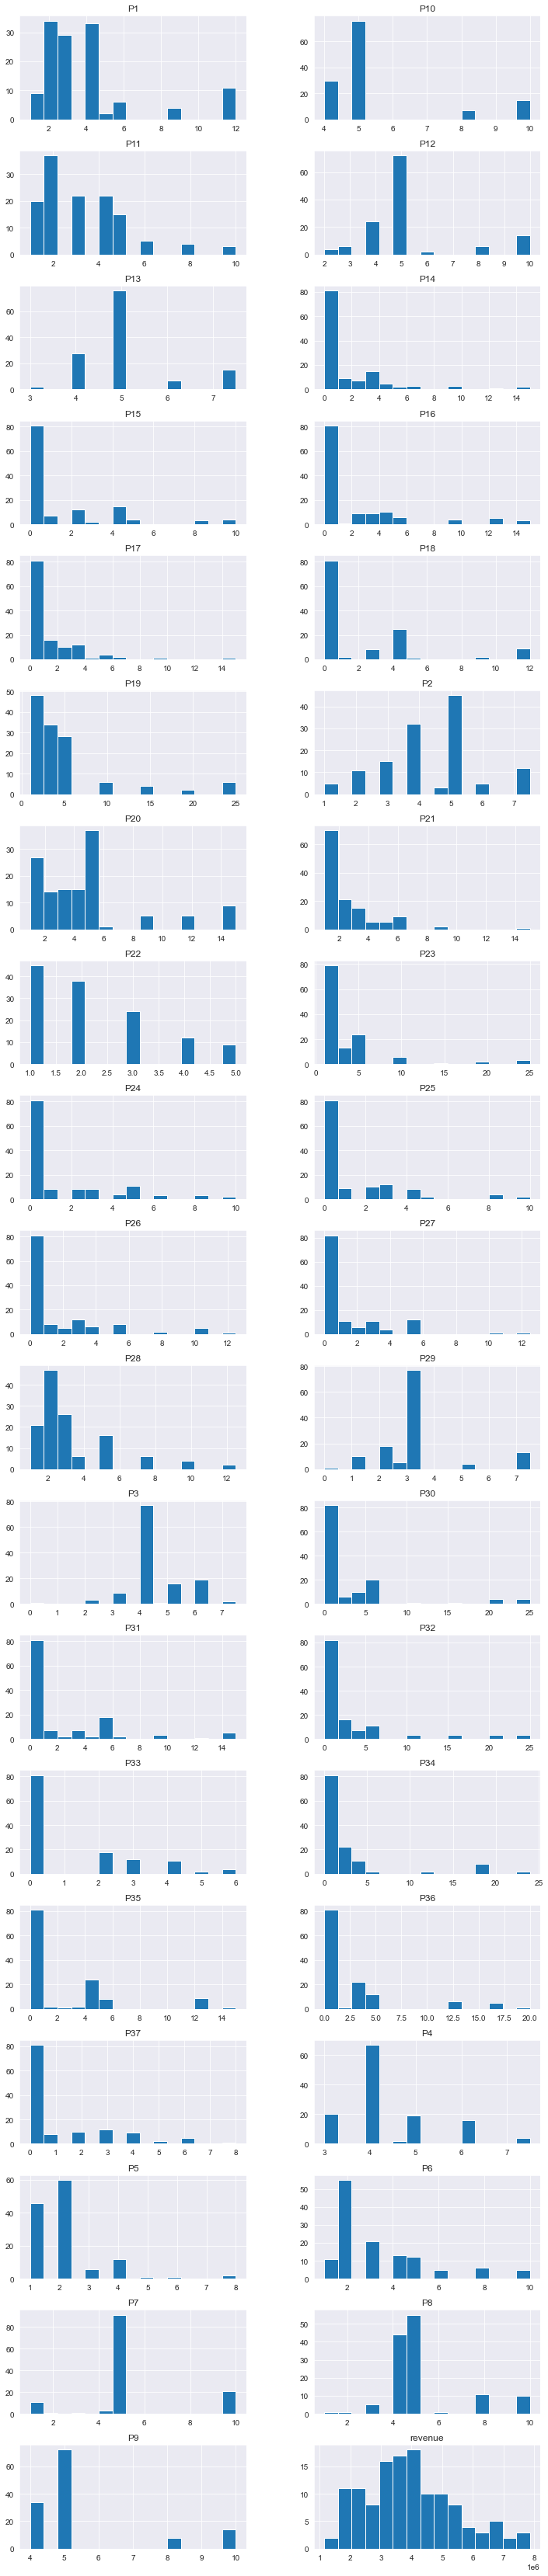

In [65]:
hist_cols = list(train.columns[4:42])
train[hist_cols].hist(figsize= (12,60), layout=(19,2), bins=15)

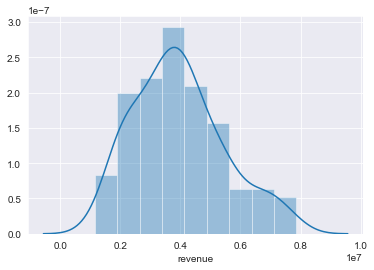

In [66]:
sns.distplot(train['revenue'])

[Text(0, 0.5, 'Revenue / 10^-7'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Annual Restaurant Revenue')]

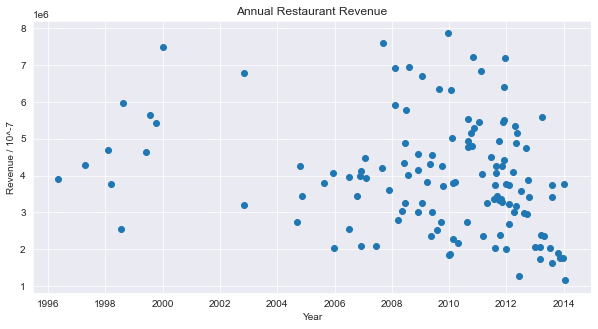

In [67]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(train['Open Date'], train['revenue'])
ax.set(ylabel="Revenue / 10^-7",
       xlabel='Year',
       title='Annual Restaurant Revenue')

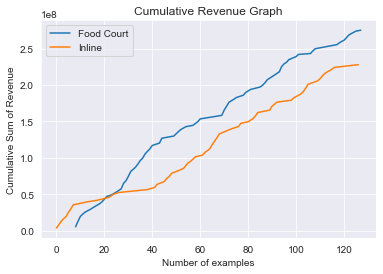

In [69]:
train[train['Type'] == 'FC']['revenue'].cumsum().plot()
train[train['Type'] == 'IL']['revenue'].cumsum().plot()
plt.ylabel('Cumulative Sum of Revenue')
plt.xlabel('Number of examples')
plt.legend(['Food Court', 'Inline'])
plt.title('Cumulative Revenue Graph');

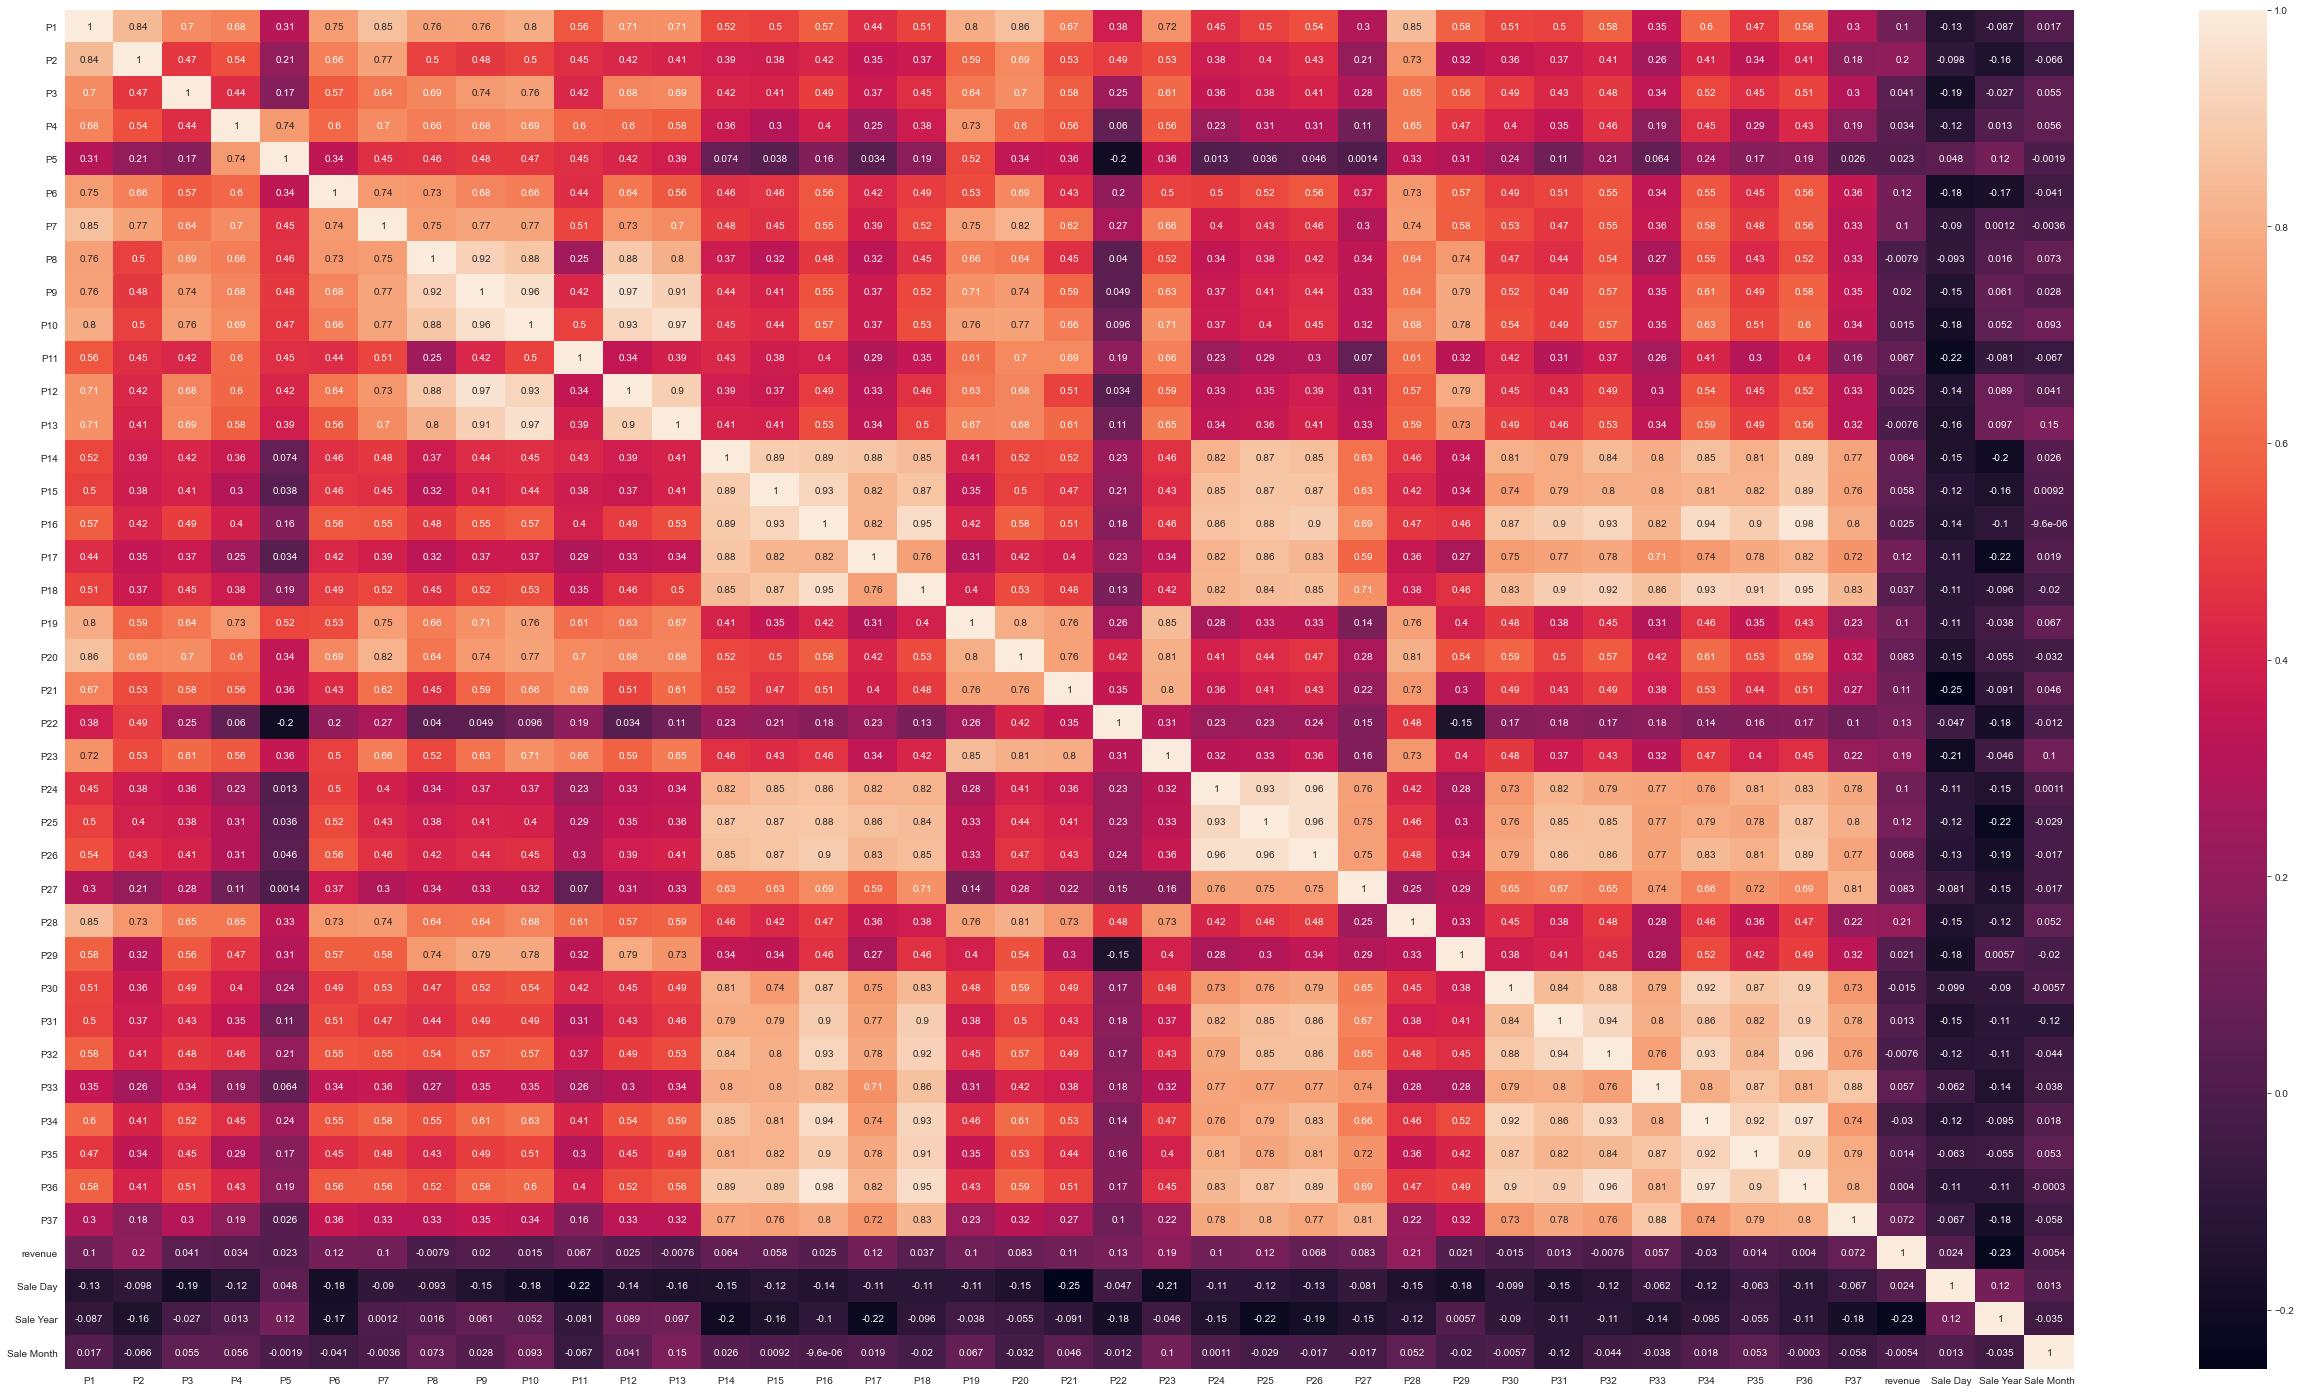

In [70]:
plt.figure(figsize=(45,25))
sns.heatmap(train.corr(),annot=True)
sns.set(font_scale=1.4)

In [117]:
numerical_features = train.select_dtypes([np.number]).columns.tolist()
categorical_features = train.select_dtypes(exclude = [np.number,np.datetime64]).columns.tolist()
print(categorical_features)
print(numerical_features)

['City', 'City Group', 'Type']
['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue', 'Sale Day', 'Sale Year', 'Sale Month']


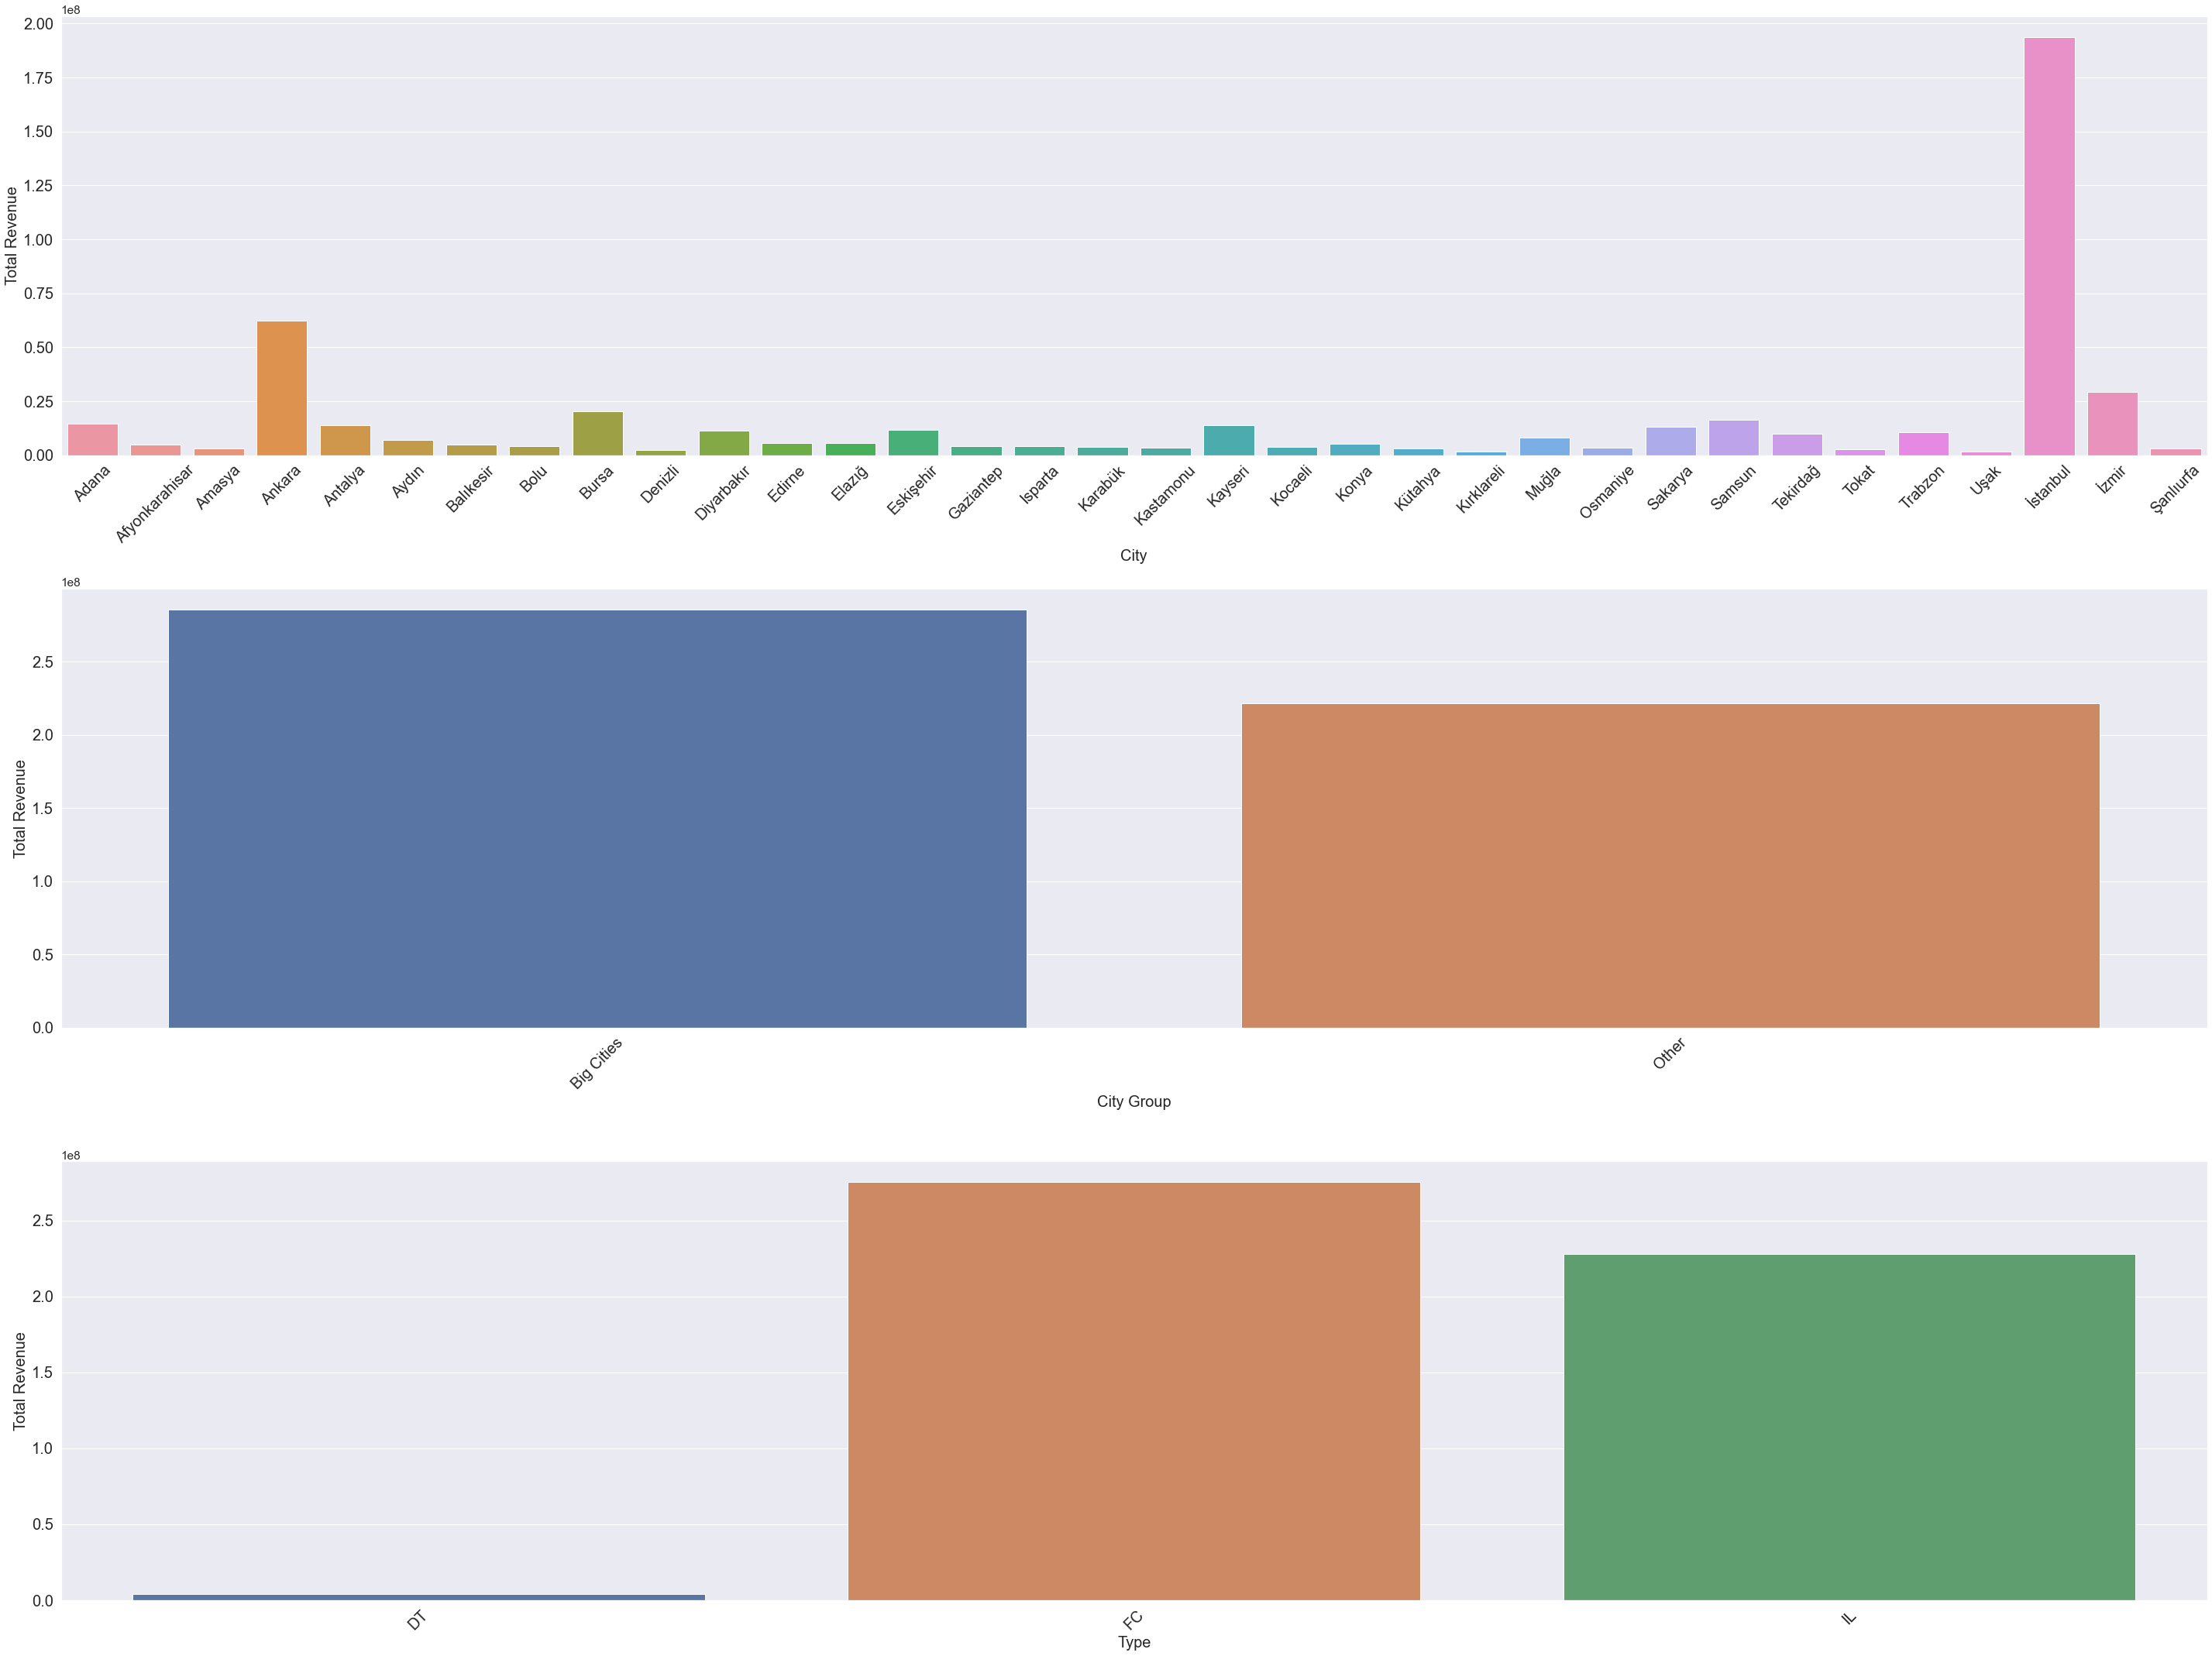

In [118]:
fig, ax = plt.subplots(3, 1, figsize=(40, 30))
for variable, subplot in zip(categorical_features, ax.flatten()):
    df_2 = train[[variable,'revenue']].groupby(variable).revenue.sum().reset_index()
    df_2.columns = [variable,'total_revenue']
    sns.barplot(x=variable, y='total_revenue', data=df_2 , ax=subplot)
    subplot.set_xlabel(variable,fontsize=20)
    subplot.set_ylabel('Total Revenue',fontsize=20)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)
        label.set_size(20)
    for label in subplot.get_yticklabels():
        label.set_size(20)
fig.tight_layout()

## Data Modelling

In [174]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [179]:
df_train = pd.read_csv("C:/Users/SHUBHAM ARORA/Desktop/BDDA/Restaurant Revenue Prediction/train.csv")

In [180]:
df_test = pd.read_csv("C:/Users/SHUBHAM ARORA/Desktop/BDDA/Restaurant Revenue Prediction/test.csv", index_col='Id')

In [181]:
from datetime import date, datetime

def calculate_age(born):
        born = datetime.strptime(born, "%m/%d/%Y").date()
        today = date.today()
        return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

df_train['Age'] = df_train['Open Date'].apply(calculate_age)
df_test['Age'] = df_test['Open Date'].apply(calculate_age)

df_train = df_train.drop('Open Date', axis=1)
df_test = df_test.drop('Open Date', axis=1)

df_train = df_train.drop('Id', axis=1)


In [182]:
numerical_features = df_train.select_dtypes([np.number]).columns.tolist()
categorical_features = df_train.select_dtypes(exclude = [np.number,np.datetime64]).columns.tolist()
print(categorical_features)
print(numerical_features)

['City', 'City Group', 'Type']
['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue', 'Age']


count    1.370000e+02
mean     4.453533e+06
std      2.576072e+06
min      1.149870e+06
25%      2.999068e+06
50%      3.939804e+06
75%      5.166635e+06
max      1.969694e+07
Name: revenue, dtype: float64


[Text(0, 0.5, 'P(revenue)'), Text(0.5, 0, 'revenue')]

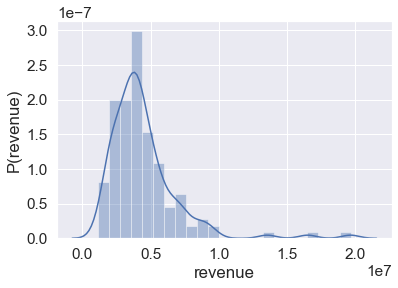

In [183]:
print(df_train['revenue'].describe())
sns.distplot(a=df_train['revenue'], kde=True).set(xlabel='revenue', ylabel='P(revenue)')

In [184]:
df_train[df_train['revenue'] > 10000000 ]

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Age
16,İstanbul,Big Cities,FC,3,5.0,4.0,4.0,2,5,5,4,5,4,3,5,4.0,0,0,0,0,0,1,4,1,1,1,0,0,0.0,0.0,2.0,2.0,0,0,0,0,0,0,0,0,19696939.0,21
75,İstanbul,Big Cities,FC,5,5.0,4.0,5.0,1,4,5,3,4,4,5,3,4.0,0,0,0,0,0,5,5,5,5,4,0,0,0.0,0.0,5.0,0.0,0,0,0,0,0,0,0,0,16549064.0,15
99,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,4,5,4,4,4,5,3,4.0,5,5,5,5,5,5,5,5,3,1,5,5,5.0,1.0,5.0,1.0,5,5,4,2,5,5,5,3,13575224.0,21


In [185]:
# Drop outliers
df_train = df_train[df_train['revenue'] < 10000000 ]
df_train.reset_index(drop=True).head()

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Age
0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,22
1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,13
2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,8
3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,9
4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,12


In [188]:
print("--- Train set ---")
print(df_train['City Group'].value_counts())
print("---- Test set ----")
print(df_test['City Group'].value_counts())

--- Train set ---
Big Cities    75
Other         59
Name: City Group, dtype: int64
---- Test set ----
Other         50728
Big Cities    49272
Name: City Group, dtype: int64


In [189]:
print("--- Train set ---")
print(df_train['Type'].value_counts())
print("---- Test set ----")
print(df_test['Type'].value_counts())

--- Train set ---
FC    74
IL    59
DT     1
Name: Type, dtype: int64
---- Test set ----
FC    57019
IL    40447
DT     2244
MB      290
Name: Type, dtype: int64


In [190]:
y = df_train['revenue']
df_train=df_train.drop('revenue', axis=1)

In [191]:
print("Shapes: Train set ", df_train.shape ,", Test ",df_test.shape)
df_full = pd.concat([df_train,df_test])
print("Full dataset shapes: ", df_full.shape)

Shapes: Train set  (134, 41) , Test  (100000, 41)
Full dataset shapes:  (100134, 41)


In [192]:
df_full = df_full.drop('City', axis=1)
df_full.shape

(100134, 40)

In [193]:
p_name = ['P'+str(i) for i in range(1,38)]

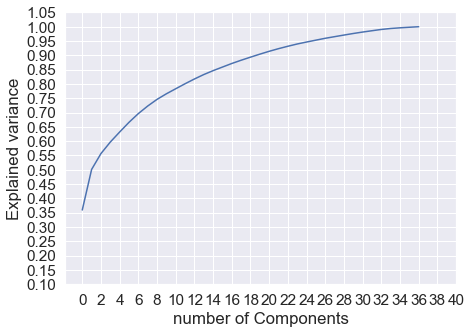

In [194]:
from sklearn.decomposition import PCA
pca = PCA().fit(df_full[p_name])
plt.figure(figsize=(7,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of Components')
plt.ylabel('Explained variance')
plt.yticks(np.arange(0.1,1.1,0.05))
plt.xticks(np.arange(0,41,2))
plt.grid(True)

In [195]:
df=pd.get_dummies(df_full, dtype=float)

In [196]:
numTrain=df_train.shape[0]

train = df[:numTrain]
test = df[numTrain:]

In [198]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(train,y,test_size=0.3,random_state=42)
print("Shapes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Shapes:  (93, 44) (41, 44) (93,) (41,)


In [199]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

In [200]:
best_estimators=[]

In [201]:
## parameters
params = {
    "n_estimators": [10, 30, 50, 100],
    "learning_rate": [.01, 0.1, 0.5, 0.9, 0.95, 1],
    "random_state" : [42]
}

## XGBoost Regressor
AdaBoostR =   AdaBoostRegressor()
AdaBoostR_grid = GridSearchCV(AdaBoostR, params, scoring='r2', cv=5, n_jobs=-1)
AdaBoostR_grid.fit(X_train, y_train)

## Output
print("Best parameters:  {}:".format(AdaBoostR_grid.best_params_))
print("Best score: {}".format(AdaBoostR_grid.best_score_))

## Append to list
best_estimators.append(["AdaBoostR",AdaBoostR_grid.best_estimator_])

Best parameters:  {'learning_rate': 1, 'n_estimators': 100, 'random_state': 42}:
Best score: 0.1292124776573984


In [202]:
from sklearn.neighbors import KNeighborsRegressor

params_knn = {
    'n_neighbors' : [3, 5, 7, 9, 11],
}

knn_model = KNeighborsRegressor()
knn_regressor = GridSearchCV(knn_model, params_knn, scoring='neg_root_mean_squared_error', cv=10, n_jobs=-1)
knn_regressor.fit(X_train, y_train)
print(f'Optimal neighbors: {knn_regressor.best_params_["n_neighbors"]}')
print(f'Best score: {knn_regressor.best_score_}')

Optimal neighbors: 9
Best score: -1667855.9257426858
